In [2]:
import csv
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
#import chart_studio.plotly as py
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
%matplotlib inline 

[nltk_data] Downloading package punkt to /Users/achampion/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/achampion/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
!pip install sumy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [67]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [33]:
df = pd.read_csv('barbenheimer.csv')

In [34]:
df.head()

,score,title,username,date,review,label
0,9.0,Barbie is On Her Way to the Oscars,Mini135,19 July 2023,When I first knew there was a Barbie movie in ...,Barbie
1,3.0,"Unfortunately, too much politics",gabrielddimitrov,23 July 2023,"The comedy was ok at times. Otherwise, this mo...",Barbie
2,3.0,Why did I waste my time?,brocklawmurphy,23 July 2023,This movie was a massive let down. It was neve...,Barbie
3,9.0,Simply Outstanding,brentsbulletinboard,24 July 2023,Telling the story of a larger-than-life indivi...,Oppenheimer
4,10.0,10/10!!!!!!!,meltingmel,21 July 2023,Wow. WOW!!!!My favorite movie of all time is A...,Barbie


In [39]:
df.dtypes

score       float64
title        object
username     object
date         object
review       object
label        object
dtype: object

In [16]:
df.count()

score       1190
title       1190
username    1190
date        1190
review      1190
label       1190
dtype: int64

In [35]:
df.drop_duplicates(subset=None, inplace=True)

In [36]:
df.count()

score       1190
title       1190
username    1190
date        1190
review      1190
label       1190
dtype: int64

In [18]:
df_groupby_label = df.groupby(['label']).count()

In [19]:
df_groupby_label

,score,title,username,date,review
label,,,,,
Barbie,595,595,595,595,595
Oppenheimer,595,595,595,595,595


In [22]:
df_groupby_score = df.groupby(['score'])

In [25]:
df_groupby_score.count()['title']

score
1.0      69
2.0      25
3.0      46
4.0      41
5.0      53
6.0      94
7.0     106
8.0     146
9.0     162
10.0    448
Name: title, dtype: int64

In [32]:
df_groupby_score.count()['username']

score
1.0      69
2.0      25
3.0      46
4.0      41
5.0      53
6.0      94
7.0     106
8.0     146
9.0     162
10.0    448
Name: username, dtype: int64

In [29]:
df['score'].mean() 

7.645378151260505

In [30]:
df['score'].mode() 

0    10.0
Name: score, dtype: float64

In [31]:
df['score'].median() 

9.0

In [40]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df['Month']=df['date'].dt.month 

In [50]:
df.dtypes

score              float64
title               object
username            object
date        datetime64[ns]
review              object
label               object
Month                int32
dtype: object

In [51]:
df['Year']=df['date'].dt.year 

In [55]:
df['Day']=df['date'].dt.dayofweek 

In [56]:
df

,score,title,username,date,review,label,Month,Year,Day
0,9.0,Barbie is On Her Way to the Oscars,Mini135,2023-07-19,When I first knew there was a Barbie movie in ...,Barbie,7,2023,2
1,3.0,"Unfortunately, too much politics",gabrielddimitrov,2023-07-23,"The comedy was ok at times. Otherwise, this mo...",Barbie,7,2023,6
2,3.0,Why did I waste my time?,brocklawmurphy,2023-07-23,This movie was a massive let down. It was neve...,Barbie,7,2023,6
3,9.0,Simply Outstanding,brentsbulletinboard,2023-07-24,Telling the story of a larger-than-life indivi...,Oppenheimer,7,2023,0
4,10.0,10/10!!!!!!!,meltingmel,2023-07-21,Wow. WOW!!!!My favorite movie of all time is A...,Barbie,7,2023,4
...,...,...,...,...,...,...,...,...,...
1185,5.0,Playful idea about the Barbie concept that get...,movieman6-413-929510,2023-07-23,"Barbie is a new fantasy comedy directed, part ...",Barbie,7,2023,6
1186,8.0,"Overall, very solid",bfvyjym,2023-07-23,"Like most Nolan movies, the writing and cinema...",Oppenheimer,7,2023,6
1187,7.0,Barbenheimer pt. 2,daisukereds,2023-07-25,"Great cinematography, exceptional acting, terr...",Oppenheimer,7,2023,1
1188,6.0,"Overhyped movie, had its moments though",hyllus-01262,2023-07-23,"The first half was pretty enjoyable, fun, ligh...",Barbie,7,2023,6


In [59]:
df_groupby_month = df.groupby(['Month'])
df_groupby_month.count()['title']

Month
7    1190
Name: title, dtype: int64

In [60]:
df_groupby_day = df.groupby(['Day'])
df_groupby_day.count()['title']

Day
0    130
1     85
2    137
3    134
4    245
5    229
6    230
Name: title, dtype: int64

In [62]:
df_groupby_day.count()['title'].mean()

170.0

In [69]:
analyser = SentimentIntensityAnalyzer()

In [75]:
df['Sentiment_Analysis'] = df['review'].apply(analyser.polarity_scores)

In [78]:
df['neg'] = [analyser.polarity_scores(x)['neg'] for x in df['review']]
df['neu'] = [analyser.polarity_scores(x)['neu'] for x in df['review']]
df['pos'] = [analyser.polarity_scores(x)['pos'] for x in df['review']]

In [79]:
df

,score,title,username,date,review,label,Month,Year,Day,Sentiment_Analysis,neg,neu,pos
0,9.0,Barbie is On Her Way to the Oscars,Mini135,2023-07-19,When I first knew there was a Barbie movie in ...,Barbie,7,2023,2,"{'neg': 0.014, 'neu': 0.838, 'pos': 0.148, 'co...",0.014,0.838,0.148
1,3.0,"Unfortunately, too much politics",gabrielddimitrov,2023-07-23,"The comedy was ok at times. Otherwise, this mo...",Barbie,7,2023,6,"{'neg': 0.058, 'neu': 0.767, 'pos': 0.175, 'co...",0.058,0.767,0.175
2,3.0,Why did I waste my time?,brocklawmurphy,2023-07-23,This movie was a massive let down. It was neve...,Barbie,7,2023,6,"{'neg': 0.101, 'neu': 0.848, 'pos': 0.051, 'co...",0.101,0.848,0.051
3,9.0,Simply Outstanding,brentsbulletinboard,2023-07-24,Telling the story of a larger-than-life indivi...,Oppenheimer,7,2023,0,"{'neg': 0.038, 'neu': 0.796, 'pos': 0.166, 'co...",0.038,0.796,0.166
4,10.0,10/10!!!!!!!,meltingmel,2023-07-21,Wow. WOW!!!!My favorite movie of all time is A...,Barbie,7,2023,4,"{'neg': 0.02, 'neu': 0.771, 'pos': 0.209, 'com...",0.020,0.771,0.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,5.0,Playful idea about the Barbie concept that get...,movieman6-413-929510,2023-07-23,"Barbie is a new fantasy comedy directed, part ...",Barbie,7,2023,6,"{'neg': 0.032, 'neu': 0.89, 'pos': 0.078, 'com...",0.032,0.890,0.078
1186,8.0,"Overall, very solid",bfvyjym,2023-07-23,"Like most Nolan movies, the writing and cinema...",Oppenheimer,7,2023,6,"{'neg': 0.038, 'neu': 0.855, 'pos': 0.108, 'co...",0.038,0.855,0.108
1187,7.0,Barbenheimer pt. 2,daisukereds,2023-07-25,"Great cinematography, exceptional acting, terr...",Oppenheimer,7,2023,1,"{'neg': 0.048, 'neu': 0.776, 'pos': 0.175, 'co...",0.048,0.776,0.175
1188,6.0,"Overhyped movie, had its moments though",hyllus-01262,2023-07-23,"The first half was pretty enjoyable, fun, ligh...",Barbie,7,2023,6,"{'neg': 0.09, 'neu': 0.677, 'pos': 0.232, 'com...",0.090,0.677,0.232


In [82]:
df['Sentiment'] = np.where(df['neg'] >= df['pos'], 'Negative', 'Positive')

In [83]:
df

,score,title,username,date,review,label,Month,Year,Day,Sentiment_Analysis,neg,neu,pos,Sentiment
0,9.0,Barbie is On Her Way to the Oscars,Mini135,2023-07-19,When I first knew there was a Barbie movie in ...,Barbie,7,2023,2,"{'neg': 0.014, 'neu': 0.838, 'pos': 0.148, 'co...",0.014,0.838,0.148,Positive
1,3.0,"Unfortunately, too much politics",gabrielddimitrov,2023-07-23,"The comedy was ok at times. Otherwise, this mo...",Barbie,7,2023,6,"{'neg': 0.058, 'neu': 0.767, 'pos': 0.175, 'co...",0.058,0.767,0.175,Positive
2,3.0,Why did I waste my time?,brocklawmurphy,2023-07-23,This movie was a massive let down. It was neve...,Barbie,7,2023,6,"{'neg': 0.101, 'neu': 0.848, 'pos': 0.051, 'co...",0.101,0.848,0.051,Negative
3,9.0,Simply Outstanding,brentsbulletinboard,2023-07-24,Telling the story of a larger-than-life indivi...,Oppenheimer,7,2023,0,"{'neg': 0.038, 'neu': 0.796, 'pos': 0.166, 'co...",0.038,0.796,0.166,Positive
4,10.0,10/10!!!!!!!,meltingmel,2023-07-21,Wow. WOW!!!!My favorite movie of all time is A...,Barbie,7,2023,4,"{'neg': 0.02, 'neu': 0.771, 'pos': 0.209, 'com...",0.020,0.771,0.209,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,5.0,Playful idea about the Barbie concept that get...,movieman6-413-929510,2023-07-23,"Barbie is a new fantasy comedy directed, part ...",Barbie,7,2023,6,"{'neg': 0.032, 'neu': 0.89, 'pos': 0.078, 'com...",0.032,0.890,0.078,Positive
1186,8.0,"Overall, very solid",bfvyjym,2023-07-23,"Like most Nolan movies, the writing and cinema...",Oppenheimer,7,2023,6,"{'neg': 0.038, 'neu': 0.855, 'pos': 0.108, 'co...",0.038,0.855,0.108,Positive
1187,7.0,Barbenheimer pt. 2,daisukereds,2023-07-25,"Great cinematography, exceptional acting, terr...",Oppenheimer,7,2023,1,"{'neg': 0.048, 'neu': 0.776, 'pos': 0.175, 'co...",0.048,0.776,0.175,Positive
1188,6.0,"Overhyped movie, had its moments though",hyllus-01262,2023-07-23,"The first half was pretty enjoyable, fun, ligh...",Barbie,7,2023,6,"{'neg': 0.09, 'neu': 0.677, 'pos': 0.232, 'com...",0.090,0.677,0.232,Positive


In [84]:
df_groupby_sentiment = df.groupby(['Sentiment'])

In [89]:
df_groupby_sentiment.count()

,score,title,username,date,review,label,Month,Year,Day,Sentiment_Analysis,neg,neu,pos
Sentiment,,,,,,,,,,,,,
Negative,132,132,132,132,132,132,132,132,132,132,132,132,132
Positive,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058


In [101]:
positive_reviews = df.loc[df['Sentiment'] == 'Positive'] 

In [102]:
positive_reviews

,score,title,username,date,review,label,Month,Year,Day,Sentiment_Analysis,neg,neu,pos,Sentiment
0,9.0,Barbie is On Her Way to the Oscars,Mini135,2023-07-19,When I first knew there was a Barbie movie in ...,Barbie,7,2023,2,"{'neg': 0.014, 'neu': 0.838, 'pos': 0.148, 'co...",0.014,0.838,0.148,Positive
1,3.0,"Unfortunately, too much politics",gabrielddimitrov,2023-07-23,"The comedy was ok at times. Otherwise, this mo...",Barbie,7,2023,6,"{'neg': 0.058, 'neu': 0.767, 'pos': 0.175, 'co...",0.058,0.767,0.175,Positive
3,9.0,Simply Outstanding,brentsbulletinboard,2023-07-24,Telling the story of a larger-than-life indivi...,Oppenheimer,7,2023,0,"{'neg': 0.038, 'neu': 0.796, 'pos': 0.166, 'co...",0.038,0.796,0.166,Positive
4,10.0,10/10!!!!!!!,meltingmel,2023-07-21,Wow. WOW!!!!My favorite movie of all time is A...,Barbie,7,2023,4,"{'neg': 0.02, 'neu': 0.771, 'pos': 0.209, 'com...",0.020,0.771,0.209,Positive
5,10.0,So much fun!!,thelmaelise,2023-07-26,This is such a unique film! It was so much fun...,Barbie,7,2023,2,"{'neg': 0.092, 'neu': 0.631, 'pos': 0.277, 'co...",0.092,0.631,0.277,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,5.0,Playful idea about the Barbie concept that get...,movieman6-413-929510,2023-07-23,"Barbie is a new fantasy comedy directed, part ...",Barbie,7,2023,6,"{'neg': 0.032, 'neu': 0.89, 'pos': 0.078, 'com...",0.032,0.890,0.078,Positive
1186,8.0,"Overall, very solid",bfvyjym,2023-07-23,"Like most Nolan movies, the writing and cinema...",Oppenheimer,7,2023,6,"{'neg': 0.038, 'neu': 0.855, 'pos': 0.108, 'co...",0.038,0.855,0.108,Positive
1187,7.0,Barbenheimer pt. 2,daisukereds,2023-07-25,"Great cinematography, exceptional acting, terr...",Oppenheimer,7,2023,1,"{'neg': 0.048, 'neu': 0.776, 'pos': 0.175, 'co...",0.048,0.776,0.175,Positive
1188,6.0,"Overhyped movie, had its moments though",hyllus-01262,2023-07-23,"The first half was pretty enjoyable, fun, ligh...",Barbie,7,2023,6,"{'neg': 0.09, 'neu': 0.677, 'pos': 0.232, 'com...",0.090,0.677,0.232,Positive


In [105]:
pos_rev = positive_reviews['review'].tolist()

In [108]:
corpus = ' '.join(pos_rev)

In [113]:
lang = 'english'
count = 10
new_string = corpus.replace('.', '. ').strip()
lsa = LsaSummarizer(Stemmer(lang))
lsa.stop_words = get_stop_words(lang)
parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
lsa_summary = lsa(parser.document, count)
lsa_s = [str(sent) for sent in lsa_summary]
summary = ' '.join(lsa_s)

/opt/homebrew/lib/python3.11/site-packages/sumy/summarizers/lsa.py:76: UserWarning:

Number of words (7357) is lower than number of sentences (13472). LSA algorithm may not work properly.



In [114]:
summary

'Nolan\'s three-hour opus about the life of Dr.  J.  Robert Oppenheimer (Cillian Murphy), director of the Manhattan Project (and more commonly known as the Father of the Atomic Bomb), provides viewers with a comprehensive biography of this brilliant and thoughtful yet often-inscrutable and naïve physicist who took on a patently dangerous venture that left him morally conflicted about the nature of his creation. Moreover, the narrative is skillfully and eloquently brought to life by this offering\'s outstanding ensemble cast, including Murphy, Matt Damon, Tom Conti, Benny Safdie, Emily Blunt, Florence Pugh, Gary Oldman, Rami Malek, and, especially, Robert Downey Jr. , who delivers a stellar, award-worthy supporting performance showing acting chops that I never knew he possessed. This movie is directed by Christopher Nolan (Tenet) and stars Cillian Murphy (28 Days Later), Emily Blunt (The Devil Wears Prada), Matt Damon (Good Will Hunting), Robert Downey Jr.  (Iron Man), Florence Pugh (Mi

In [116]:
negative_reviews = df.loc[df['Sentiment'] == 'Negative'] 

In [118]:
neg_rev = negative_reviews['review'].tolist()

In [122]:
corpus2 = ' '.join(neg_rev)

In [123]:
new_string2 = corpus2.replace('.', '. ').strip()
parser = PlaintextParser.from_string(new_string2, Tokenizer(lang))
lsa_summary = lsa(parser.document, count)
lsa_s = [str(sent) for sent in lsa_summary]
summary = ' '.join(lsa_s)

In [124]:
summary

'As a drama that explores the themes of genius, hubris, and the consequences of individual and collective errors, it immerses viewers in the turbulent journey of Oppenheimer, whose research and development of the atomic bombs dropped on Hiroshima and Nagasaki forever changed the world. And while we do not physically witness a single casualty from a bomb explosion in the entire film, this chaotic chain reaction of performances are so effectively conveyed that we don\'t need to see people dying to understand how dreadfully terrifying it is for man to have the power that he does. Subsequent to the war, Lewis Straus, who in reality was indeed a very vindictive, mean spirited, petty person, wants Oppenheimer\'s security clearance taken away for his sympathies with the American Communist Party, of which his brother Frank is also an active member. She and I also dislike the fact that whole "storyline" was about Barbie sad that she is flatfoot and has cellulite which everyone made fun of her a

In [142]:
positive_words = []
for review in pos_rev:
    for word in (review.split()):
        positive_words.append(word)
        

In [143]:
positive_words

['When',
 'I',
 'first',
 'knew',
 'there',
 'was',
 'a',
 'Barbie',
 'movie',
 'in',
 'production,',
 'a',
 'live',
 'action,',
 'I',
 'thought',
 '"It',
 'should',
 'be',
 'as',
 'bad',
 'as',
 'the',
 'others',
 'movies"...',
 'When',
 'I',
 'notice',
 'was',
 'Greta',
 'Gerwig',
 'making',
 'the',
 'movie,',
 'my',
 'expectation',
 'get',
 'higher.',
 'Then,',
 'when',
 'I',
 'saw',
 'the',
 'cast,',
 'my',
 'expectations',
 'were',
 'even',
 'higher!I',
 'went',
 'to',
 'watch',
 'this',
 'movie',
 'in',
 'the',
 'premiere',
 'and',
 'I',
 'can',
 'assure',
 'you',
 'this',
 'movie',
 'is',
 'a',
 "masterpiece.It's",
 'purposely',
 'not',
 'realistic,',
 'has',
 'an',
 'excellent',
 'director',
 'and',
 'an',
 'excellent',
 'production',
 'and',
 'story.There',
 'are',
 'lots',
 'of',
 'fun',
 'moments,',
 'but',
 'this',
 'movie',
 'is',
 'a',
 'satire',
 'to',
 'the',
 'life',
 'of',
 'Barbie.The',
 'fact',
 'that',
 'compares',
 'the',
 'dream',
 'life',
 'of',
 'Barbie',
 'to'

In [144]:
word_count = Counter(positive_words)

print(word_count.most_common())

[('the', 11901), ('and', 7531), ('a', 5967), ('of', 5818), ('to', 5206), ('is', 4075), ('I', 3196), ('in', 3118), ('that', 2755), ('it', 2728), ('was', 2385), ('movie', 2115), ('this', 2097), ('for', 1780), ('with', 1709), ('as', 1624), ('but', 1484), ('The', 1379), ('film', 1323), ('be', 1204), ('you', 1166), ('not', 1161), ('on', 1112), ('are', 1077), ('Barbie', 1037), ('have', 896), ('so', 889), ('an', 887), ('all', 874), ('like', 746), ('at', 733), ('about', 700), ('his', 698), ('just', 698), ('by', 666), ('from', 624), ('one', 623), ('my', 594), ('more', 590), ('It', 589), ('were', 584), ('or', 559), ("it's", 555), ('they', 549), ('what', 528), ('Nolan', 526), ('some', 516), ('will', 516), ('has', 513), ('Oppenheimer', 500), ('he', 496), ('me', 491), ('very', 487), ('really', 486), ('also', 483), ('its', 470), ('can', 465), ('who', 460), ('This', 455), ('how', 437), ('see', 433), ('would', 432), ('great', 423), ('if', 421), ('out', 416), ('much', 411), ('had', 411), ('into', 399),

In [145]:
clean_tokens = positive_words[:]
words = ['The', 'I', 'It', 'And']
sr = stopwords.words('english')
 
for token in positive_words:
    if token in stopwords.words('english') or token in words:
 
        clean_tokens.remove(token)

In [146]:
clean_tokens

['When',
 'first',
 'knew',
 'Barbie',
 'movie',
 'production,',
 'live',
 'action,',
 'thought',
 '"It',
 'bad',
 'others',
 'movies"...',
 'When',
 'notice',
 'Greta',
 'Gerwig',
 'making',
 'movie,',
 'expectation',
 'get',
 'higher.',
 'Then,',
 'saw',
 'cast,',
 'expectations',
 'even',
 'higher!I',
 'went',
 'watch',
 'movie',
 'premiere',
 'assure',
 'movie',
 "masterpiece.It's",
 'purposely',
 'realistic,',
 'excellent',
 'director',
 'excellent',
 'production',
 'story.There',
 'lots',
 'fun',
 'moments,',
 'movie',
 'satire',
 'life',
 'Barbie.The',
 'fact',
 'compares',
 'dream',
 'life',
 'Barbie',
 'real',
 'life',
 'real',
 'world',
 'fantastic.',
 "It's",
 'never',
 'seen',
 'thing.',
 'compares',
 "women's",
 'mistreatment,',
 'real',
 "tragedy's...",
 'real',
 'good',
 'idea...',
 'Everything',
 'movie',
 'really',
 'good.',
 'Go',
 'watch',
 'movie.',
 'deserves',
 'attention.',
 'comedy',
 'ok',
 'times.',
 'Otherwise,',
 'movie',
 'modern',
 'political',
 'agenda,',

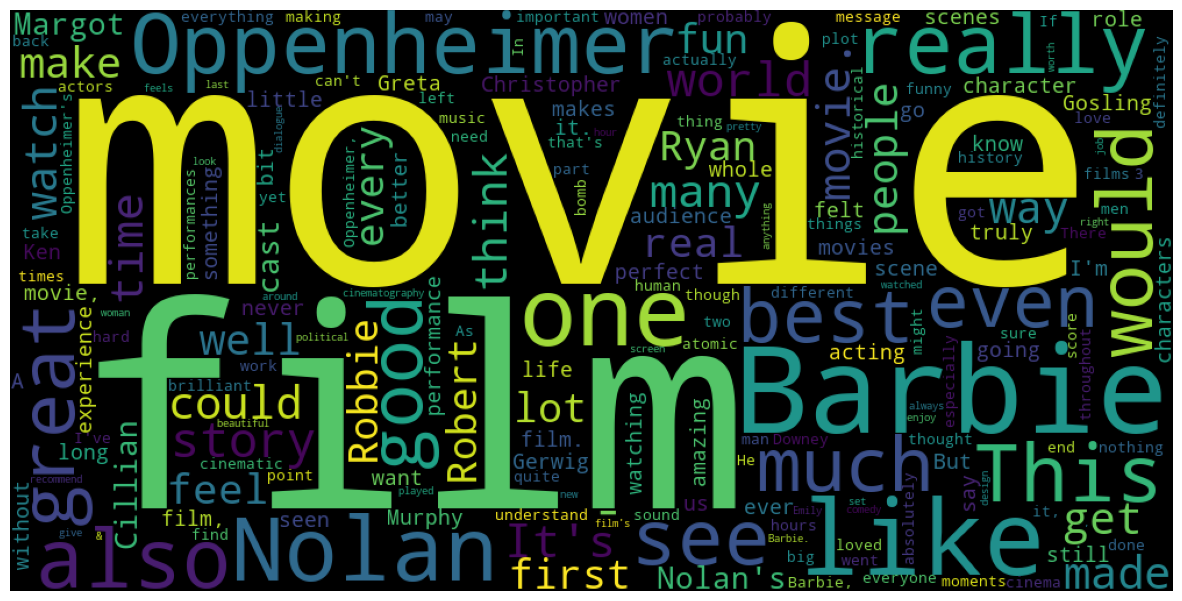

In [147]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Counter(clean_tokens))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [148]:
negative_words = []
for review in neg_rev:
    for word in (review.split()):
        negative_words.append(word)
        

In [149]:
negative_words

['This',
 'movie',
 'was',
 'a',
 'massive',
 'let',
 'down.',
 'It',
 'was',
 'never',
 'really',
 'funny',
 'and',
 'just',
 'kept',
 'pushing',
 'political',
 'issues',
 'in',
 'my',
 'face.',
 'I',
 "don't",
 'care',
 'about',
 'politics',
 'when',
 "I'm",
 'watching',
 'a',
 'movie,',
 'and',
 'I',
 'expect',
 'a',
 'well',
 'written',
 'story.',
 'This',
 'film',
 'is',
 'just',
 'bad,',
 'and',
 'I',
 'was',
 'actually',
 'interested',
 'in',
 'it.',
 'I',
 'had',
 'high',
 'expectations',
 'for',
 'this',
 'film',
 'and',
 'I',
 'think',
 'it',
 'did',
 'not',
 'deliver.',
 "It's",
 'not',
 'a',
 'valid',
 'social',
 'commentary',
 'because',
 'it',
 'does',
 'not',
 'prove',
 'there',
 'even',
 'is',
 'a',
 'patriarchy',
 'and',
 'give',
 'an',
 'example',
 'in',
 'real',
 'life.',
 'Actions',
 'speak',
 'louder',
 'than',
 'words',
 'and',
 'this',
 'movie',
 'is',
 'so',
 'overrated',
 'that',
 'I',
 'created',
 'an',
 'account',
 'just',
 'to',
 'leave',
 'a',
 'bad',
 'rev

In [150]:
clean_tokens = negative_words[:]
words = ['The', 'I', 'It', 'And']
sr = stopwords.words('english')
 
for token in negative_words:
    
    
 
    if token in stopwords.words('english') or token in words:
 
        clean_tokens.remove(token)

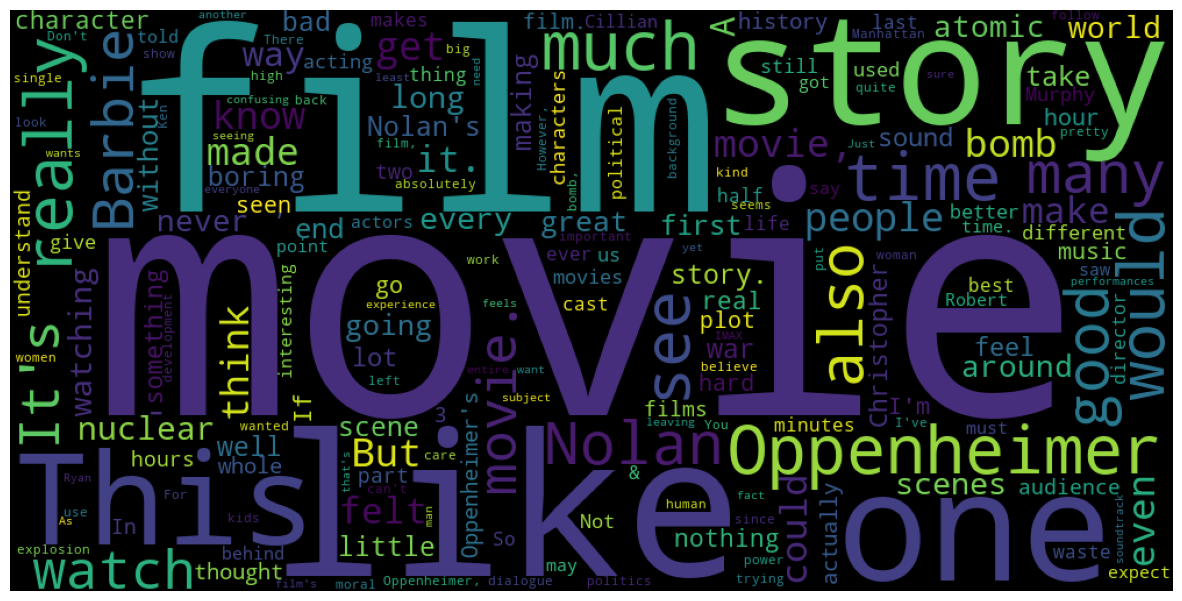

In [151]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Counter(clean_tokens))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()